In [ ]:
import numpy as np;
import pandas as pd;

 1. Loading the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#loading the raw data
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/spam detection/Spam Email Detection - spam.csv")
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


2. Data Cleaning

In [ ]:
#removing unwanted columns from the dataset
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],  inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.shape

(5572, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [ ]:
#checking for duplicate datas and removing them
df.duplicated().sum()

409

In [ ]:
df=df.drop_duplicates(keep='first')
df.shape

(5163, 2)

In [ ]:
#renaming the columns
df.rename(columns={'v1':'response','v2':'message'},inplace=True)
df.sample(5)

<ipython-input-35-54aeab5ae7ee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'v1':'response','v2':'message'},inplace=True)


,response,message
5011,ham,U attend ur driving lesson how many times a wk...
199,ham,"Found it, ENC &lt;#&gt; , where you at?"
4082,ham,"Good afternoon, my love. It was good to see yo..."
3843,ham,"Yeah that's what I thought, lemme know if anyt..."
975,ham,Hey no I ad a crap nite was borin without ya 2...


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
df['response'] = encoder.fit_transform(df['response'])

In [ ]:
df.head()

,response,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


3. Data visualisation

In [ ]:
df['response'].value_counts()

0    4516
1     647
Name: response, dtype: int64

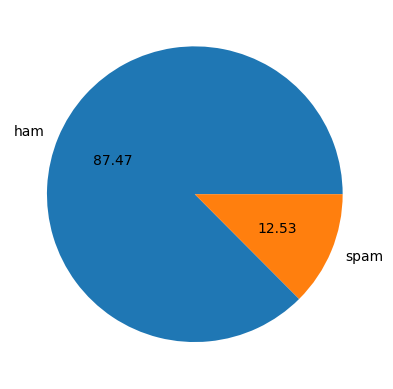

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['response'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

Note: Here ham is 0 and spam is 1

4. Preping the data for building the model

In [ ]:
# separating the data as texts and label

X = df['message']

Y = df['response']

In [ ]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will �_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: message, Length: 5163, dtype: object

In [ ]:
Y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: response, Length: 5163, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
# splitting the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [ ]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5163,)
(4130,)
(1033,)


5. Feature extraction

In [ ]:
# transform the text data to feature vectors that can be used as input to the Logistic regression

feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase=True)

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# convert Y_train and Y_test values as integers

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [ ]:
print(X_train)

983     LOOK AT THE FUCKIN TIME. WHAT THE FUCK YOU THI...
2117    Wish u many many returns of the day.. Happy bi...
4732    Good Morning my Dear Shijutta........... Have ...
3579    Have a lovely night and when you wake up to se...
2804                     I think it's all still in my car
                              ...                        
807                     Boooo you always work. Just quit.
991     Hi im having the most relaxing time ever! we h...
1724              There bold 2  &lt;#&gt; . Is that yours
3522                                      Try neva mate!!
1746    I don know account details..i will ask my mom ...
Name: message, Length: 4130, dtype: object


In [ ]:
print(X_train_features)

# **Using Logistic Regression Model**

5. Training the model

In [ ]:
model = LogisticRegression()

In [ ]:
# training the the model with the training data
model.fit(X_train_features, Y_train)

LogisticRegression()

6. evaluating the trained model

In [ ]:
# prediction on training data

predict_train = model.predict(X_train_features)
accuracy_train = accuracy_score(Y_train, predict_train)

In [ ]:
print("Accuracy on training data:", accuracy_train )

Accuracy on training data: 0.9646489104116223


In [ ]:
# prediction on testing data

predict_test = model.predict(X_test_features)
accuracy_test = accuracy_score(Y_test, predict_test)

In [ ]:
print("Accuracy on training data:", accuracy_test )

Accuracy on training data: 0.9554695062923524


7. Forming the predictive System

In [ ]:
#input_msg=["Words can explain how thankful I am to you. I will always cherish this gift"]
input_msg=["Had your contract mobile 11 Mnths? Latest Motorola, Nokia etc. all FREE! Double Mins & Text on Orange tariffs. TEXT YES for callback, no to remove from record"]

input_features=feature_extraction.transform(input_msg)
prediction=model.predict(input_features)

# making prediction

prediction = model.predict(input_features)
print(prediction)


if (prediction[0]==0):
  print('Ham mail')

else:
  print('Spam mail')

[1]
Spam mail


# **Using the SVC model**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

svc_model = SVC()
svc_model.fit(X_train_features,Y_train)

SVC()

In [ ]:
import seaborn as sns
y_predict = svc_model.predict(X_test_features)
cm = confusion_matrix(Y_test, y_predict)

<Axes: >

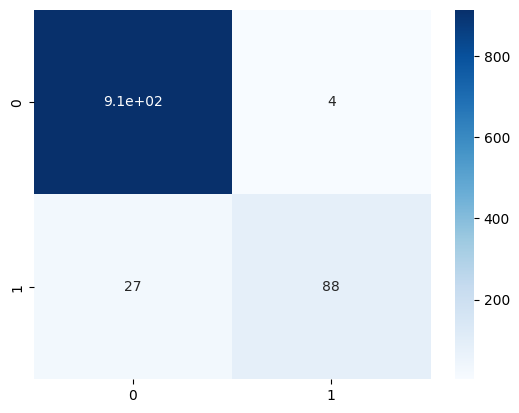

In [ ]:
sns.heatmap(cm, annot=True,cmap='Blues')

In [ ]:
print(classification_report(Y_test, y_predict))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       918
           1       0.96      0.77      0.85       115

    accuracy                           0.97      1033
   macro avg       0.96      0.88      0.92      1033
weighted avg       0.97      0.97      0.97      1033



In [ ]:
input_msg=["Words can explain how thankful I am to you. I will always cherish this gift"]
#input_msg=["Had your contract mobile 11 Mnths? Latest Motorola, Nokia etc. all FREE! Double Mins & Text on Orange tariffs. TEXT YES for callback, no to remove from record"]

input_features=feature_extraction.transform(input_msg)
prediction=svc_model.predict(input_features)

# making prediction

prediction = model.predict(input_features)
print(prediction)


if (prediction[0]==0):
  print('Ham mail')

else:
  print('Spam mail')

[0]
Ham mail
